In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
pd.__version__

'0.25.1'

In [65]:
df = pd.read_csv("Consumo_cerveja.csv", decimal=",", thousands=".")
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.dtypes

Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [67]:
df = df[['Temperatura Media (C)','Consumo de cerveja (litros)']]
df.head()

,Temperatura Media (C),Consumo de cerveja (litros)
0,27.30,25461.0
1,27.02,28972.0
2,24.82,30814.0
3,23.98,29799.0
4,23.82,28900.0


In [68]:
df2 = df.rename(columns={'Temperatura Media (C)':'Temperatura',
                                   'Consumo de cerveja (litros)':'consumo'})
df2.columns

Index(['Temperatura', 'consumo'], dtype='object')

In [69]:
df2.dtypes

Temperatura    float64
consumo        float64
dtype: object

In [70]:
df2.Temperatura

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
936      NaN
937      NaN
938      NaN
939      NaN
940      NaN
Name: Temperatura, Length: 941, dtype: float64

In [71]:
x = df2.Temperatura
y = df2.consumo

In [72]:
x

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
936      NaN
937      NaN
938      NaN
939      NaN
940      NaN
Name: Temperatura, Length: 941, dtype: float64

In [73]:
promedio = df2["consumo"].mean()

In [74]:
df2["consumo"].dtype

dtype('float64')

In [75]:
y = df2["consumo"].replace(np.nan, promedio)

In [76]:
y

0      25461.000000
1      28972.000000
2      30814.000000
3      29799.000000
4      28900.000000
           ...     
936    25401.367123
937    25401.367123
938    25401.367123
939    25401.367123
940    25401.367123
Name: consumo, Length: 941, dtype: float64

In [77]:
df2["Temperatura"]

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
936      NaN
937      NaN
938      NaN
939      NaN
940      NaN
Name: Temperatura, Length: 941, dtype: float64

In [78]:
promedio2 = df2['Temperatura'].mean()

In [82]:
df2["Temperatura"] = df2["Temperatura"].replace(np.nan, promedio2)

In [83]:
x

0      27.300000
1      27.020000
2      24.820000
3      23.980000
4      23.820000
         ...    
936    21.226356
937    21.226356
938    21.226356
939    21.226356
940    21.226356
Name: Temperatura, Length: 941, dtype: float64

In [84]:
y

0      25461.000000
1      28972.000000
2      30814.000000
3      29799.000000
4      28900.000000
           ...     
936    25401.367123
937    25401.367123
938    25401.367123
939    25401.367123
940    25401.367123
Name: consumo, Length: 941, dtype: float64

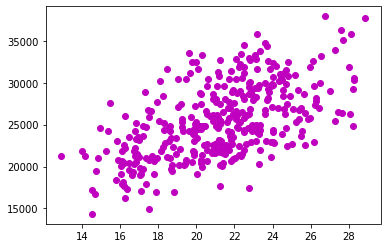

In [88]:
plt.scatter(x,y,color='m')
#plt.ylim(1, 200000)
plt.show()

In [89]:
def estimate_coef(x,y):
    
    ## y = b_0 + b_1*x
    
    # number of observations/points 
    n = np.size(x)
    
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
    
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x
    
    return(b_0,b_1)
print(estimate_coef(x,y))


(8528.907283947374, 794.8825370060837)


In [90]:
def correlation(x,y):
    ## for dataframe objects,both x amnd y are dataframe objects
    return(x.corr(y))

def standard_deviation(a):
    ## for dataframe objects
    return(a.std())

mean = lambda b:b.mean()

def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta""" 
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta
least_squares_fit(x,y)


(8528.907283985154, 794.8825370043038)

In [91]:
b = estimate_coef(x,y)
b

(8528.907283947374, 794.8825370060837)

In [92]:
y_pred=df2['Temperatura'].apply(lambda a:b[0] + b[1]*a)
y_pred

0      30229.200544
1      30006.633434
2      28257.891852
3      27590.190521
4      27463.009315
           ...     
936    25401.367123
937    25401.367123
938    25401.367123
939    25401.367123
940    25401.367123
Name: Temperatura, Length: 941, dtype: float64

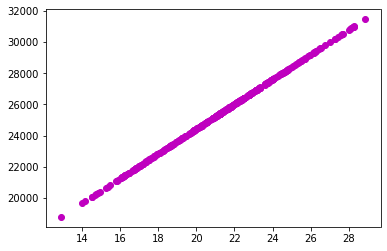

In [93]:
plt.scatter(x,y_pred,color= 'm')


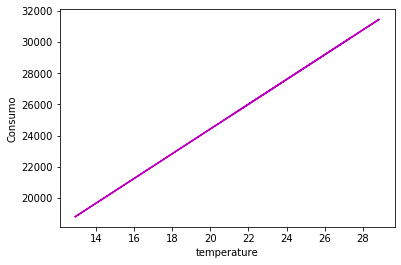

In [95]:

plt.xlabel('temperature')
plt.ylabel('Consumo')
plt.plot(x,y_pred,color= 'm')
plt.show()


In [96]:
from sklearn import linear_model

In [97]:
lm = linear_model.LinearRegression()
model = lm.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

In [98]:
y_predicted = lm.predict(np.array(x).reshape(-1,1))
y_predicted

array([[30229.2005442 ],
       [30006.63343384],
       [28257.89185243],
       [27590.19052135],
       [27463.00931543],
       [27431.21401395],
       [27606.08817209],
       [28321.48245539],
       [30944.59482751],
       [29799.96397422],
       [30483.56295604],
       [29164.05794462],
       [28814.30962834],
       [29164.05794462],
       [29084.56969092],
       [29593.2945146 ],
       [31469.21730193],
       [30992.28777973],
       [30960.49247825],
       [30531.25590826],
       [28655.33312093],
       [25809.65363846],
       [25253.23586256],
       [26906.59153953],
       [27924.04118689],
       [26334.27611288],
       [27288.13515729],
       [28941.49083426],
       [28400.97070909],
       [26652.22912768],
       [25730.16538476],
       [27733.26937801],
       [26397.86671584],
       [26938.38684101],
       [26111.70900252],
       [24649.12513443],
       [25269.1335133 ],
       [25905.0395429 ],
       [26620.4338262 ],
       [27606.08817209],


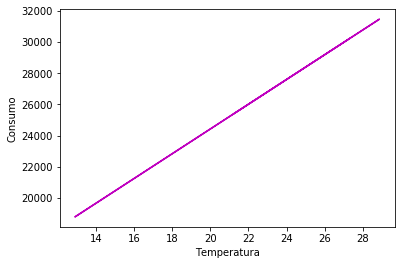

In [100]:
plt.xlabel('Temperatura')
plt.ylabel('Consumo')
plt.plot(x,y_predicted,color='m')
plt.show()


In [101]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [102]:
mse = mean_squared_error(y , y_predicted)
print("mean squared error is :",mse)
print("root mean squared error is :",math.sqrt(mse))

mean squared error is : 5014234.525045369
root mean squared error is : 2239.248651902099


In [103]:
r2_score(y , y_predicted)

0.33018204933243234

In [104]:
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1189.9621681347471 70.15391023324243


In [107]:
y_pred=df['Temperatura'].apply(lambda a:c + m*a)
y_pred.head()

KeyError: 'Temperatura'

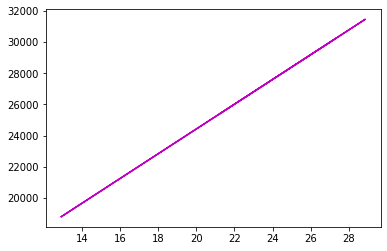

In [108]:
plt.plot(x,y_pred,color='m')

In [109]:
mean_squared_error(y , y_pred)

5014234.525045368